## Biden individual contributions

This notebook is for the analysis of individual campaign contributions to Joe Biden. Data came from the Federal Election Commission, but filtered out and cleaned from another notebook.

In [1]:
import pandas as pd
import datetime
import numpy as np
import csv
import time
import re
from plotnine import *
pd.set_option('display.max_columns', None)

In [2]:
biden = pd.read_csv('filtered/biden individual contributions-Jan2024.csv')
biden

,filer_id,amendment_id,report_type,election_code,image_no,transaction_type,entity_type,name,city,state,zip,employer,occupation,transaction_date,amount,other_id,transaction_id,file_num,memo_code,memo_text,unique_row_id
0,C00703975,N,Q2,P2024,2.023072e+17,15E,IND,"LEWIS, STEPHEN",MINNEAPOLIS,MN,554013203.0,SELF,ECONOMIST,2023-04-25,250.0,C00401224,1645659,1714723.0,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,4.071820e+18
1,C00703975,N,Q2,P2024,2.023072e+17,15E,IND,"LIGHT, JUDY",ARLINGTON,VA,222031842.0,NOT EMPLOYED,NOT EMPLOYED,2023-04-25,500.0,C00401224,1646159,1714723.0,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,4.071820e+18
2,C00703975,N,Q2,P2024,2.023072e+17,15E,IND,"HALL, RAKIN",OCEANSIDE,CA,920577913.0,U OF UTAH,EDUCATION,2023-04-25,250.0,C00401224,1652859,1714723.0,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,4.071820e+18
3,C00703975,N,Q2,P2024,2.023072e+17,15E,IND,"DEBROCKY, MARIE",SCHENECTADY,NY,123095424.0,SELF,BUSINESS OWNER,2023-04-25,12.0,C00401224,1654359,1714723.0,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,4.071820e+18
4,C00703975,N,Q2,P2024,2.023072e+17,15E,IND,"THOMPSON, ANN",GIBSONIA,PA,150448511.0,NOT EMPLOYED,NOT EMPLOYED,2023-04-25,300.0,C00401224,1657259,1714723.0,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,4.071820e+18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142539,C00744946,N,YE,P,2.024013e+17,15E,IND,"TAMPAS, JO",ROUND ROCK,TX,786655648.0,NOT EMPLOYED,NOT EMPLOYED,2023-12-31,50.0,C00401224,3638176,1753470.0,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,4.020620e+18
142540,C00744946,N,YE,P,2.024013e+17,15E,IND,"TAYLOR, BENJAMIN",HARTFORD,CT,61053805.0,COGNIZANT,COGNISANT BUSINESS ANALYST,2023-12-31,25.0,C00401224,3639965,1753470.0,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,4.020620e+18
142541,C00744946,N,YE,P,2.024013e+17,15E,IND,"TAYLOR, CHRISTOPHER",WEAVERVILLE,NC,287879273.0,ARVATO,CUSTOMER SERVICE REPRESENTATIVE,2023-12-31,25.0,C00401224,3624945,1753470.0,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,4.020620e+18
142542,C00744946,N,YE,P,2.024013e+17,15E,IND,"BOIES, ROBIN",WELLS,NV,898359810.0,BOIES RANCH,RANCHER,2023-12-31,25.0,C00401224,3632697,1753470.0,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,4.020620e+18


## Sort according to date of transaction

In [3]:
biden = biden.sort_values('transaction_date').reset_index(drop=True)
biden

,filer_id,amendment_id,report_type,election_code,image_no,transaction_type,entity_type,name,city,state,zip,employer,occupation,transaction_date,amount,other_id,transaction_id,file_num,memo_code,memo_text,unique_row_id
0,C00703975,N,Q2,P2024,2.023072e+17,15E,IND,"LEWIS, STEPHEN",MINNEAPOLIS,MN,554013203.0,SELF,ECONOMIST,2023-04-25,250.0,C00401224,1645659,1714723.0,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,4.071820e+18
1,C00703975,N,Q2,P2024,2.023072e+17,15E,IND,"PENDLEY, DEE F.",LINDEN,VA,226421706.0,NOT EMPLOYED,NOT EMPLOYED,2023-04-25,250.0,C00401224,1662107,1714723.0,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,4.071820e+18
2,C00703975,N,Q2,P2024,2.023072e+17,15E,IND,"OZER, STUART",OAKLAND,CA,946061056.0,NOT EMPLOYED,NOT EMPLOYED,2023-04-25,2000.0,C00401224,1664255,1714723.0,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,4.071820e+18
3,C00703975,N,Q2,P2024,2.023072e+17,15E,IND,"PORTER, MARK",PORTLAND,ME,41018202.0,RETIRED,RETIRED ATTORNEY,2023-04-25,250.0,C00401224,1664121,1714723.0,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,4.071820e+18
4,C00703975,N,Q2,P2024,2.023072e+17,15E,IND,"MOON, CATHY",PALM COAST,FL,321353610.0,NOT EMPLOYED,NOT EMPLOYED,2023-04-25,250.0,C00401224,1663255,1714723.0,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,4.071820e+18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142539,C00703975,N,YE,P2024,2.024013e+17,15E,IND,"MIRZA, HAMID",PORTLAND,OR,972093155.0,NOT EMPLOYED,NOT EMPLOYED,2023-12-31,50.0,C00401224,3630886,1753513.0,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,4.020220e+18
142540,C00703975,N,YE,P2024,2.024013e+17,15E,IND,"LYNCH, ROBERT",WASHINGTON,DC,200081207.0,AMERICANS FOR THE ARTS,PRESIDENT,2023-12-31,250.0,C00401224,3628001,1753513.0,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,4.020220e+18
142541,C00703975,N,YE,P2024,2.024013e+17,15E,IND,"LYON, MARY",LAKE OSWEGO,OR,970346265.0,NOT EMPLOYED,NOT EMPLOYED,2023-12-31,25.0,C00401224,3636428,1753513.0,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,4.020220e+18
142542,C00703975,N,YE,P2024,2.024013e+17,15E,IND,"HONIG, JUDY",BETHESDA,MD,208171709.0,LAPINE GROUP,CONSULTANT,2023-12-31,1000.0,C00401224,3630790,1753513.0,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,4.020220e+18


In [4]:
biden.transaction_date = pd.to_datetime(biden.transaction_date)
biden

,filer_id,amendment_id,report_type,election_code,image_no,transaction_type,entity_type,name,city,state,zip,employer,occupation,transaction_date,amount,other_id,transaction_id,file_num,memo_code,memo_text,unique_row_id
0,C00703975,N,Q2,P2024,2.023072e+17,15E,IND,"LEWIS, STEPHEN",MINNEAPOLIS,MN,554013203.0,SELF,ECONOMIST,2023-04-25,250.0,C00401224,1645659,1714723.0,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,4.071820e+18
1,C00703975,N,Q2,P2024,2.023072e+17,15E,IND,"PENDLEY, DEE F.",LINDEN,VA,226421706.0,NOT EMPLOYED,NOT EMPLOYED,2023-04-25,250.0,C00401224,1662107,1714723.0,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,4.071820e+18
2,C00703975,N,Q2,P2024,2.023072e+17,15E,IND,"OZER, STUART",OAKLAND,CA,946061056.0,NOT EMPLOYED,NOT EMPLOYED,2023-04-25,2000.0,C00401224,1664255,1714723.0,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,4.071820e+18
3,C00703975,N,Q2,P2024,2.023072e+17,15E,IND,"PORTER, MARK",PORTLAND,ME,41018202.0,RETIRED,RETIRED ATTORNEY,2023-04-25,250.0,C00401224,1664121,1714723.0,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,4.071820e+18
4,C00703975,N,Q2,P2024,2.023072e+17,15E,IND,"MOON, CATHY",PALM COAST,FL,321353610.0,NOT EMPLOYED,NOT EMPLOYED,2023-04-25,250.0,C00401224,1663255,1714723.0,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,4.071820e+18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142539,C00703975,N,YE,P2024,2.024013e+17,15E,IND,"MIRZA, HAMID",PORTLAND,OR,972093155.0,NOT EMPLOYED,NOT EMPLOYED,2023-12-31,50.0,C00401224,3630886,1753513.0,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,4.020220e+18
142540,C00703975,N,YE,P2024,2.024013e+17,15E,IND,"LYNCH, ROBERT",WASHINGTON,DC,200081207.0,AMERICANS FOR THE ARTS,PRESIDENT,2023-12-31,250.0,C00401224,3628001,1753513.0,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,4.020220e+18
142541,C00703975,N,YE,P2024,2.024013e+17,15E,IND,"LYON, MARY",LAKE OSWEGO,OR,970346265.0,NOT EMPLOYED,NOT EMPLOYED,2023-12-31,25.0,C00401224,3636428,1753513.0,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,4.020220e+18
142542,C00703975,N,YE,P2024,2.024013e+17,15E,IND,"HONIG, JUDY",BETHESDA,MD,208171709.0,LAPINE GROUP,CONSULTANT,2023-12-31,1000.0,C00401224,3630790,1753513.0,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,4.020220e+18


## Fix zip code

The zip code format is 12345-1234. We need to put a dash there.

In [11]:
biden.zip = biden.zip.astype(str)
biden

,filer_id,amendment_id,report_type,election_code,image_no,transaction_type,entity_type,name,city,state,zip,employer,occupation,transaction_date,amount,other_id,transaction_id,file_num,memo_code,memo_text,unique_row_id
0,C00703975,N,Q2,P2024,2.023072e+17,15E,IND,"LEWIS, STEPHEN",MINNEAPOLIS,MN,554013203.0,SELF,ECONOMIST,2023-04-25,250.0,C00401224,1645659,1714723.0,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,4.071820e+18
1,C00703975,N,Q2,P2024,2.023072e+17,15E,IND,"PENDLEY, DEE F.",LINDEN,VA,226421706.0,NOT EMPLOYED,NOT EMPLOYED,2023-04-25,250.0,C00401224,1662107,1714723.0,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,4.071820e+18
2,C00703975,N,Q2,P2024,2.023072e+17,15E,IND,"OZER, STUART",OAKLAND,CA,946061056.0,NOT EMPLOYED,NOT EMPLOYED,2023-04-25,2000.0,C00401224,1664255,1714723.0,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,4.071820e+18
3,C00703975,N,Q2,P2024,2.023072e+17,15E,IND,"PORTER, MARK",PORTLAND,ME,41018202.0,RETIRED,RETIRED ATTORNEY,2023-04-25,250.0,C00401224,1664121,1714723.0,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,4.071820e+18
4,C00703975,N,Q2,P2024,2.023072e+17,15E,IND,"MOON, CATHY",PALM COAST,FL,321353610.0,NOT EMPLOYED,NOT EMPLOYED,2023-04-25,250.0,C00401224,1663255,1714723.0,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,4.071820e+18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142539,C00703975,N,YE,P2024,2.024013e+17,15E,IND,"MIRZA, HAMID",PORTLAND,OR,972093155.0,NOT EMPLOYED,NOT EMPLOYED,2023-12-31,50.0,C00401224,3630886,1753513.0,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,4.020220e+18
142540,C00703975,N,YE,P2024,2.024013e+17,15E,IND,"LYNCH, ROBERT",WASHINGTON,DC,200081207.0,AMERICANS FOR THE ARTS,PRESIDENT,2023-12-31,250.0,C00401224,3628001,1753513.0,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,4.020220e+18
142541,C00703975,N,YE,P2024,2.024013e+17,15E,IND,"LYON, MARY",LAKE OSWEGO,OR,970346265.0,NOT EMPLOYED,NOT EMPLOYED,2023-12-31,25.0,C00401224,3636428,1753513.0,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,4.020220e+18
142542,C00703975,N,YE,P2024,2.024013e+17,15E,IND,"HONIG, JUDY",BETHESDA,MD,208171709.0,LAPINE GROUP,CONSULTANT,2023-12-31,1000.0,C00401224,3630790,1753513.0,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,4.020220e+18


In [12]:
biden.zip = biden.zip.str.replace(r'[.]\d', '', regex=True)
biden

,filer_id,amendment_id,report_type,election_code,image_no,transaction_type,entity_type,name,city,state,zip,employer,occupation,transaction_date,amount,other_id,transaction_id,file_num,memo_code,memo_text,unique_row_id
0,C00703975,N,Q2,P2024,2.023072e+17,15E,IND,"LEWIS, STEPHEN",MINNEAPOLIS,MN,554013203,SELF,ECONOMIST,2023-04-25,250.0,C00401224,1645659,1714723.0,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,4.071820e+18
1,C00703975,N,Q2,P2024,2.023072e+17,15E,IND,"PENDLEY, DEE F.",LINDEN,VA,226421706,NOT EMPLOYED,NOT EMPLOYED,2023-04-25,250.0,C00401224,1662107,1714723.0,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,4.071820e+18
2,C00703975,N,Q2,P2024,2.023072e+17,15E,IND,"OZER, STUART",OAKLAND,CA,946061056,NOT EMPLOYED,NOT EMPLOYED,2023-04-25,2000.0,C00401224,1664255,1714723.0,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,4.071820e+18
3,C00703975,N,Q2,P2024,2.023072e+17,15E,IND,"PORTER, MARK",PORTLAND,ME,41018202,RETIRED,RETIRED ATTORNEY,2023-04-25,250.0,C00401224,1664121,1714723.0,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,4.071820e+18
4,C00703975,N,Q2,P2024,2.023072e+17,15E,IND,"MOON, CATHY",PALM COAST,FL,321353610,NOT EMPLOYED,NOT EMPLOYED,2023-04-25,250.0,C00401224,1663255,1714723.0,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,4.071820e+18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142539,C00703975,N,YE,P2024,2.024013e+17,15E,IND,"MIRZA, HAMID",PORTLAND,OR,972093155,NOT EMPLOYED,NOT EMPLOYED,2023-12-31,50.0,C00401224,3630886,1753513.0,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,4.020220e+18
142540,C00703975,N,YE,P2024,2.024013e+17,15E,IND,"LYNCH, ROBERT",WASHINGTON,DC,200081207,AMERICANS FOR THE ARTS,PRESIDENT,2023-12-31,250.0,C00401224,3628001,1753513.0,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,4.020220e+18
142541,C00703975,N,YE,P2024,2.024013e+17,15E,IND,"LYON, MARY",LAKE OSWEGO,OR,970346265,NOT EMPLOYED,NOT EMPLOYED,2023-12-31,25.0,C00401224,3636428,1753513.0,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,4.020220e+18
142542,C00703975,N,YE,P2024,2.024013e+17,15E,IND,"HONIG, JUDY",BETHESDA,MD,208171709,LAPINE GROUP,CONSULTANT,2023-12-31,1000.0,C00401224,3630790,1753513.0,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,4.020220e+18


In [14]:
biden.zip = biden.zip.str.zfill(9)
biden

,filer_id,amendment_id,report_type,election_code,image_no,transaction_type,entity_type,name,city,state,zip,employer,occupation,transaction_date,amount,other_id,transaction_id,file_num,memo_code,memo_text,unique_row_id
0,C00703975,N,Q2,P2024,2.023072e+17,15E,IND,"LEWIS, STEPHEN",MINNEAPOLIS,MN,554013203,SELF,ECONOMIST,2023-04-25,250.0,C00401224,1645659,1714723.0,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,4.071820e+18
1,C00703975,N,Q2,P2024,2.023072e+17,15E,IND,"PENDLEY, DEE F.",LINDEN,VA,226421706,NOT EMPLOYED,NOT EMPLOYED,2023-04-25,250.0,C00401224,1662107,1714723.0,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,4.071820e+18
2,C00703975,N,Q2,P2024,2.023072e+17,15E,IND,"OZER, STUART",OAKLAND,CA,946061056,NOT EMPLOYED,NOT EMPLOYED,2023-04-25,2000.0,C00401224,1664255,1714723.0,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,4.071820e+18
3,C00703975,N,Q2,P2024,2.023072e+17,15E,IND,"PORTER, MARK",PORTLAND,ME,041018202,RETIRED,RETIRED ATTORNEY,2023-04-25,250.0,C00401224,1664121,1714723.0,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,4.071820e+18
4,C00703975,N,Q2,P2024,2.023072e+17,15E,IND,"MOON, CATHY",PALM COAST,FL,321353610,NOT EMPLOYED,NOT EMPLOYED,2023-04-25,250.0,C00401224,1663255,1714723.0,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,4.071820e+18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142539,C00703975,N,YE,P2024,2.024013e+17,15E,IND,"MIRZA, HAMID",PORTLAND,OR,972093155,NOT EMPLOYED,NOT EMPLOYED,2023-12-31,50.0,C00401224,3630886,1753513.0,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,4.020220e+18
142540,C00703975,N,YE,P2024,2.024013e+17,15E,IND,"LYNCH, ROBERT",WASHINGTON,DC,200081207,AMERICANS FOR THE ARTS,PRESIDENT,2023-12-31,250.0,C00401224,3628001,1753513.0,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,4.020220e+18
142541,C00703975,N,YE,P2024,2.024013e+17,15E,IND,"LYON, MARY",LAKE OSWEGO,OR,970346265,NOT EMPLOYED,NOT EMPLOYED,2023-12-31,25.0,C00401224,3636428,1753513.0,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,4.020220e+18
142542,C00703975,N,YE,P2024,2.024013e+17,15E,IND,"HONIG, JUDY",BETHESDA,MD,208171709,LAPINE GROUP,CONSULTANT,2023-12-31,1000.0,C00401224,3630790,1753513.0,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,4.020220e+18


## How much individual contributions did Biden get? 

In [15]:
daily_amount = biden.resample('D', on='transaction_date').amount.sum()
daily_amount

transaction_date
2023-04-25    2556146.0
2023-04-26    2269836.0
2023-04-27    1505735.0
2023-04-28    3673552.0
2023-04-29     106311.0
                ...    
2023-12-27     234286.0
2023-12-28     276308.0
2023-12-29    1335468.0
2023-12-30     242172.0
2023-12-31     734281.0
Freq: D, Name: amount, Length: 251, dtype: float64

<AxesSubplot:xlabel='transaction_date'>

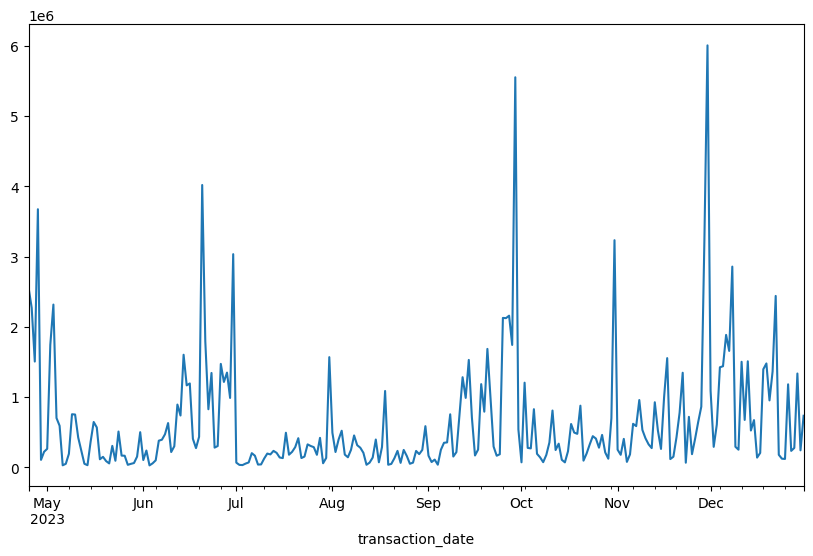

In [16]:
daily_amount.plot(figsize=(10,6))

## How many individual donors do Biden get?

In [31]:
daily_donors = biden.groupby(['name', 'state', 'zip', 'transaction_date']).sum().reset_index()
daily_donors

,name,state,zip,transaction_date,image_no,amount,transaction_id,file_num,unique_row_id
0,"A ARNESON, MARY",MN,554101838,2023-05-19,2.023072e+17,250.0,1772782,1714704.0,4.071920e+18
1,"A BAIR, JULENE",CA,954042742,2023-07-20,2.023102e+17,500.0,2252997,1731644.0,4.101920e+18
2,"A BRYANT, MICHAEL",MN,553692235,2023-10-24,2.024013e+17,2000.0,3078860,1753470.0,4.020620e+18
3,"A CHOY, CAROLYN",CA,947032114,2023-06-23,2.023072e+17,250.0,1882240,1714723.0,4.071820e+18
4,"A CHOY, CAROLYN",CA,947032114,2023-07-23,2.023102e+17,250.0,2192142,1731644.0,4.101920e+18
...,...,...,...,...,...,...,...,...,...
136752,"ZYSK, DENNIS",MI,480672034,2023-12-26,2.024013e+17,100.0,3587101,1753470.0,4.020620e+18
136753,"ZYSK, DENNIS",MI,480672034,2023-12-29,2.024013e+17,100.0,3612092,1753470.0,4.020620e+18
136754,"ZYSKIND, JOHN",NM,871118062,2023-11-02,2.024013e+17,1000.0,3153449,1753470.0,4.020620e+18
136755,"ZYSMAN, JOHN",CA,947052424,2023-06-12,2.023072e+17,250.0,1845560,1714704.0,4.071920e+18


In [36]:
daily_donors.index.resample('D', on='transaction_date').sum()

AttributeError: 'RangeIndex' object has no attribute 'resample'